In [ ]:
from random import random
import matplotlib.pyplot as plt
import time

# Algorítmo Genético

A função produto inicializa a classe dos produtos dentro do algoritmo genético que terá três características


*   O nome;
*   Espaço ocupado;
*   Seu valor

In [ ]:
class Produto():
    def __init__(self, nome, espaco, valor):
        self.nome = nome
        self.espaco = espaco
        self.valor = valor

Os indivíduos representam as soluções, eles que vão decidir o que deve e o que não deve ser selecionado, um conjunto de indivíduos formam uma população, e a partir dessa população é que o melhor indivíduo será escolhido. Os indivíduos mostram as suas escolhas de acordo com seus cromossomos, lembrando que os cromossomos possuem valores binários, caso o valor seja 1,o produto deverá ser selecionado, caso o valor seja 0, o produto não deverá ser selecionado. Para que exista um ponto de partida é necessário realizar a inicialização dos cromossomos de forma aleatória, como no caso abaixo:


In [ ]:
class Individuo():
    def __init__(self, espacos, valores, limite_espacos, geracao=0):
        self.espacos = espacos
        self.valores = valores
        self.limite_espacos = limite_espacos
        self.nota_avaliacao = 0
        self.espaco_usado = 0
        self.geracao = geracao
        self.cromossomo = []
        
        for i in range(len(espacos)):
            if random() < 0.5:
                self.cromossomo.append("0")
            else:
                self.cromossomo.append("1")

    '''
    A função avaliacao() realizará a medida de qualidade para saber como o cromossomo resolve o problema, 
    se é uma solução aceitável e se pode ser utilizada para a evolução. A nota será de acordo com os valores dos produtos, 
    e como este é o parâmetro que deve ser maximizado, então quanto maior for a nota, melhor será o cromossomo, 
    mas tem a questão do espaço que não deve ser ultrapassado, então caso a soma dos espaços ultrapasse o limite, 
    a nota do cromossomo receberá o valor de 1, este valor é padrão, porque mesmo sendo um cromossomo ruim, 
    ele ainda vai ser levado em consideração durante as evoluções, não tanto quanto um cromossomo bom, 
    mas ele terá sim a sua parcela de contribuição.
    '''

    def avaliacao(self):
        nota = 0
        soma_espacos = 0
        for i in range(len(self.cromossomo)):
           if self.cromossomo[i] == '1':
               nota += self.valores[i]
               soma_espacos += self.espacos[i]
        if soma_espacos > self.limite_espacos:
            nota = 1
        self.nota_avaliacao = nota
        self.espaco_usado = soma_espacos
        
    '''
    Na função crossover(), será feita a combinação do próprio indivíduo que está sendo criado, 
    com um outro indivíduo que será passado como parâmetro, a primeira parte será definir a posição de corte dos cromossomos, 
    depois que os 2 filhos foram gerados, eles serão inseridos na população, 
    e a geração terá que incrementar em 1, porque eles fazem parte de uma nova geração, 
    o retorno da função é uma lista que contém 2 novos indivíduos que foram gerados a partir de 2 indivíduos de uma geração anterior.
    '''
    
    def crossover(self, outro_individuo):
        corte = round(random()  * len(self.cromossomo))
        filho1 = outro_individuo.cromossomo[0:corte] + self.cromossomo[corte::]
        filho2 = self.cromossomo[0:corte] + outro_individuo.cromossomo[corte::]
        filhos = [Individuo(self.espacos, self.valores, self.limite_espacos, self.geracao + 1),
                  Individuo(self.espacos, self.valores, self.limite_espacos, self.geracao + 1)]
        filhos[0].cromossomo = filho1
        filhos[1].cromossomo = filho2
        return filhos

    '''
    A função mutacao() é bem simples, ela recebe o parâmetro taxa_mutacao, 
    que é justamente a probabilidade de ocorrer uma mutação, 
    depois percorre-se todos os genes do cromossomo e calcula-se um número aleatório, 
    a função random() retorna um valor entre 0 e 1, 
    caso esse valor esteja dentro da probabilidade que está definida na taxa_mutacao, 
    então o valor do gene sofre uma mutação, e tem o seu valor alterado, se o valor do gene era 0, 
    agora passa a ser 1, se o valor do gene era 1, agora passa a ser 0. O return self retorna o próprio objeto, mas com as alterações. 
    '''

    def mutacao(self, taxa_mutacao):
        for i in range(len(self.cromossomo)):
            if random() < taxa_mutacao:
                if self.cromossomo[i] == '1':
                    self.cromossomo[i] = '0'
                else:
                    self.cromossomo[i] = '1'
        return self

A classe **AlgoritmoGenetico** é a classe principal do algoritmo, o parâmetro **tamanho$\_$populacao** é a quantidade de indivíduos que será criado, o atributo populacao é uma lista que armazenará vários objetos do tipo Individuo, o atributo **melhor$\_$solucao** irá armazenar o melhor indivíduo, lembrando que o melhor indivíduo, é aquele que possui a maior nota, e consequentemente as melhores escolhas.

In [ ]:
class AlgoritmoGenetico():
    def __init__(self, tamanho_populacao):
        self.tamanho_populacao = tamanho_populacao
        self.populacao = []
        self.geracao = 0
        self.melhor_solucao = 0
        self.lista_solucoes = []
        
    '''
    A função inicializa_populacao() gera uma quantidade n de indivíduos, 
    lembrando que os genes serão gerados de uma forma aleatória, 
    depois o atributo melhor_solucao receberá o primeiro indivíduo como sendo o melhor, 
    até porque o primeiro indivíduo é o melhor e o pior ao mesmo tempo, mas isso logo será alterado.
    '''

    def inicializa_populacao(self, espacos, valores, limite_espacos):
        for i in range(self.tamanho_populacao):
            self.populacao.append(Individuo(espacos, valores, limite_espacos))
        self.melhor_solucao = self.populacao[0]
        
    '''
    A função ordena_populacao() não recebe nenhum parâmetro, 
    ela apenas coloca os indivíduos em ordem decrescente, sendo assim, 
    o melhor indivíduo estará sempre na primeira posição, 
    o parâmetro utilizado para ordenar os indivíduos será a nota de avaliação.
    '''

    def ordena_populacao(self):
        self.populacao = sorted(self.populacao,
                                key = lambda populacao: populacao.nota_avaliacao,
                                reverse = True)

    '''
    A função melhor_individuo() é bem simples, 
    ela recebe um indivíduo como parâmetro e de acordo com a nota, 
    definirá qual é o melhor indivíduo.
    '''

    def melhor_individuo(self, individuo):
        if individuo.nota_avaliacao > self.melhor_solucao.nota_avaliacao:
            self.melhor_solucao = individuo
            
    '''
    A função soma_avaliacoes() não recebe nenhum parâmetro, 
    ela apenas retornará a soma das notas de todos os indivíduos da população, 
    essa função será utilizada por outra logo na sequência.
    '''

    def soma_avaliacoes(self):
        soma = 0
        for individuo in self.populacao:
           soma += individuo.nota_avaliacao
        return soma
    
    '''
    A função seleciona_pai() recebe o parâmetro soma, 
    que é o retorno da função soma_avaliacoes() especificada anteriormente, 
    e o retorno da função seleciona_pai() será o ID do elemento que foi selecionado, 
    a população é uma lista de n indivíduos, então o ID será a posição do indivíduo dentro da lista. 
    A variável pai recebe -1 para mostrar que ainda nenhum indivíduo foi selecionado, valor_sorteado é um valor aleatório.
    '''

    def seleciona_pai(self, soma_avaliacao):
        pai = -1
        valor_sorteado = random() * soma_avaliacao
        soma = 0
        i = 0
        while i < len(self.populacao) and soma < valor_sorteado:
            soma += self.populacao[i].nota_avaliacao
            pai += 1
            i += 1
        return pai
   
    '''
    A função visualiza_geracao() apenas exibe o espaço e o cromossomo que foi utilizado, 
    a variável melhor recebe o primeiro elemento da população, 
    porque a lista foi ordenada em ordem decrescente.
    '''

    def visualiza_geracao(self): #Imprime todas as gerações
        melhor = self.populacao[0]
        """
        print("G:%s -> Valor: %s Espaço: %s Cromossomo: %s" % (self.populacao[0].geracao,
                                                               melhor.nota_avaliacao,
                                                               melhor.espaco_usado,
                                                               melhor.cromossomo))
    """

    '''
    A função resolver() é a principal função do código, porque ela chama todos os outros métodos, 
    e também retornará a solução do problema, 5 parâmetros são passados pra ela, 
    o primeiro é a  taxa_mutacao, e como já foi mencionado antes, 
    é a probabilidade de acontecer uma mutação, o segundo é  numero_geracoes, 
    como o próprio nome já está mostrando é a quantidade de gerações que serão geradas durante a execução do algoritmo, 
    o terceiro é uma lista contendo os espaços que serão ocupados por cada produto individualmente,
    o quarto também é uma lista, mas este contém os valores de cada produto individualmente,
    por último é o limite de espaço que os produtos poderão ocupar.
    '''

    '''
    A primeira coisa a se fazer é inicializar a população,
    para isso tem-se que chamar a função inicializa_populacao(),
    depois avaliar, para isso tem-se que chamar a função avaliacao(), 
    agora é necessário que se faça a ordenação da população, e quando isso acontecer, 
    o melhor indivíduo será o primeiro da lista, para que a ordenação aconteça,
    deve-se chamar o método ordena_populacao(),
    depois disso chama-se o método visualiza_geracao() só para mostrar qual o melhor indivíduo da geração atual. 
    Agora é hora de realizar as interações entre as gerações, a quantidade de gerações que serão formadas, 
    está especificada pela variável numero_geracoes, 
    2 pais serão escolhidos para fazer a reprodução de 2 novos filhos, 
    cada filho passará pelo processo de mutação, passar pelo processo de mutação, 
    não significa necessariamente que eles irão sofrer mutação, até porque isso depende da probabilidade preestabelecida.
    '''

    '''
    Depois que a nova população substituiu a anterior, é necessário fazer avaliação da população, 
    depois a ordenação, depois faz-se a visualização da geração. Repetindo o processo, 
    o melhor indivíduo estará no início da lista de indivíduos, então o método melhor_individuo() será chamado, 
    e lembrando que este método sempre compara o melhor indivíduo de cada população, com o até então considerado melhor, 
    no final de todo o processo, ele retornará o melhor indivíduo de todas as gerações.
    '''

    def resolver(self, taxa_mutacao, numero_geracoes, espacos, valores, limite_espacos):
        self.inicializa_populacao(espacos, valores, limite_espacos)
        global contador
        contador=0

        for individuo in self.populacao:
            individuo.avaliacao()

        self.ordena_populacao()
        self.melhor_solucao = self.populacao[0]
        self.lista_solucoes.append(self.melhor_solucao.nota_avaliacao)
        self.visualiza_geracao()
        
        for geracao in range(numero_geracoes):
            soma_avaliacao = self.soma_avaliacoes()
            nova_populacao = []
            
            for individuos_gerados in range(0, self.tamanho_populacao, 2):
                pai1 = self.seleciona_pai(soma_avaliacao)
                pai2 = self.seleciona_pai(soma_avaliacao)
                filhos = self.populacao[pai1].crossover(self.populacao[pai2])
                nova_populacao.append(filhos[0].mutacao(taxa_mutacao))
                nova_populacao.append(filhos[1].mutacao(taxa_mutacao))
            
            self.populacao = list(nova_populacao)
            
            for individuo in self.populacao:
                individuo.avaliacao()
            
            self.ordena_populacao()
            self.visualiza_geracao()
            melhor = self.populacao[0]
            self.lista_solucoes.append(melhor.nota_avaliacao)
            self.melhor_individuo(melhor)
        
        if (self.melhor_solucao.nota_avaliacao != 1):
          print("\nMelhor solução -> G: %s Valor: %s Espaço: %s Cromossomo: %s" %
                (self.melhor_solucao.geracao,
                 self.melhor_solucao.nota_avaliacao,
                 self.melhor_solucao.espaco_usado,
                 self.melhor_solucao.cromossomo))
        else:
           contador=1
           print("Com os parâmetros dados não foi possível encontrar uma solução.")
        
        return self.melhor_solucao.cromossomo


Melhor solução -> G: 12 Valor: 430441.25999999995 Espaço: 79.82653 Cromossomo: ['1', '1', '1', '1', '1', '0', '0', '1', '1', '1', '1', '0', '1', '1', '0', '1', '1', '1', '1', '1', '1', '0', '1', '1', '0', '1', '1', '0', '1', '0', '0', '1', '0', '1', '1', '1', '0', '1', '1', '1', '1', '1', '0', '1', '1', '1', '0', '1', '1', '1', '0', '1', '1', '1', '1', '0', '0', '1', '1', '1', '0', '0', '0', '0', '1', '1', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '1', '1', '1', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0', '1', '1', '0', '1', '1', '0', '1', '0', '1', '1', '0', '0', '0', '1', '0', '0', '1', '1', '0', '1', '1', '1', '1', '1', '1', '0', '0', '1', '0', '1', '0', '0', '1', '1', '1', '0', '1', '1', '0', '0', '1', '1', '0', '1', '0', '0', '1', '0', '1', '0', '1', '1', '1', '1', '1', '1', '0', '1', '0', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '1', '1', '1', '1', '1', '0', '0', '0',

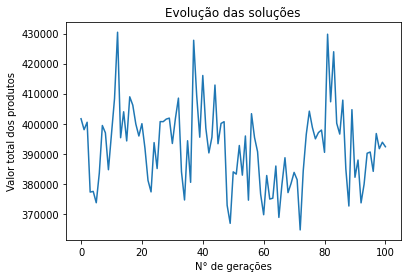

In [ ]:
'''
A principal parte do programa é a main, pois é onde tudo acontece, 
primeiro é criada uma lista para armazenar todos os produtos, 
logo em seguida é feita a conexão com o banco de dados, e as 3 informações dos produtos serão armazenadas, 
primeiro é o nome, segundo o espaço e por último o valor do produto. 
A quantidade não é inserida na lista, ela é utilizada apenas para mostrar quantas vezes um produto será inserido na lista, 
como todas as quantidades foram definidas como sendo 10, cada produto será inserido 10 vezes na lista, totalizando 250 produtos.
'''

'''
No código abaixo, foram criadas 3 listas que irão armazenar os espaços ocupados pelos produtos, 
os valores e os nomes, a variável limite armazena o limite de espaço que poderá ser ocupado pelos produtos selecionados, 
somando todos os produtos, o espaço total ocupado é de: 163,23m^3, então o limite reduzirá este valor para 80m^3, 
a variável tamanho_populacao indica a quantidade de indivíduos que terá por cada geração, 
a variável taxa_mutacao indica a probabilidade de ocorrer uma mutação, 
que no exemplo acima está definida como 5%, a variável numero_geracoes indica a quantidade de gerações que serão geradas. 
Depois tem-se a inicialização da população, e a variável resultado irá receber uma lista contendo a melhor solução.
'''

if __name__ == '__main__':
    lista_produtos = []
   
    nome_produto = ['Geladeira Brastemp', 'PS5', 'TV 65', 'Fogão Brastemp', 'Lava louças', 'Ar condicionado',
                    'Sofá', 'Conjunto sala de jantar', 'Painel para TV', 'Purificador de água', 'Máquina de lavar roupa',
                    'Cama de solteiro', 'Cama de casal', 'Notebook Lenovo', 'Notebook Dell', 'Notebook Acer',
                    'Iphone 11', 'Galaxy S20 Ultra', 'Microondas Electrolux', 'Ferro de passar roupa',
                    'Aspirador de pó', 'Chuveiro', 'Ventilador', 'Guarda roupa', 'Cafeteira']
    
    espaco_produto = [1.155, 0.0105, 0.370, 0.516, 0.303, 0.7259, 2.898, 1.152, 1.294, 0.028, 0.518,
                      1.278, 2.158, 0.0018, 0.0019, 0.0016, 0.00091, 0.00011, 0.0865, 0.0259, 0.0054,
                      0.0107, 0.4, 3.348, 0.0341]
    
    valor_produto = [4859.10, 4999, 4099, 4859.10, 3999, 3379, 2492.49, 1488.02, 503.39, 1199,
                     1899.05, 930.90, 1551.03, 3699, 3899, 3609.05, 4463.07, 5299, 2429.1, 1481.89,
                     2165.89, 388.23, 284.90, 1367.90, 3484.19]
    
    controle = 0
    dez = 0
    
    for i in range(250):
        lista_produtos.append(Produto(nome_produto[controle], espaco_produto[controle], valor_produto[controle]))
        dez += 1
        if dez == 10:
            controle += 1
            dez = 0
        
    espacos = []
    valores = []
    nomes = []
    
    ini = time.time()
    for produto in lista_produtos:
        espacos.append(produto.espaco)
        valores.append(produto.valor)
        nomes.append(produto.nome)
    limite = 80
    tamanho_populacao = 50
    taxa_mutacao = 0.05
    numero_geracoes = 100
    ag = AlgoritmoGenetico(tamanho_populacao)
    resultado = ag.resolver(taxa_mutacao, numero_geracoes, espacos, valores, limite)
    
    preco_mostrado = []
    nomes_mostrado = []
    quantidade_mostrada = []
    quantidade = 0
    verifica = 0
    
    for i in range(len(lista_produtos)):
        if resultado[i] == '1' and verifica == 0:
            nome = lista_produtos[i].nome
            controle_de_preco = lista_produtos[i].valor
            quantidade += 1
            verifica = 1
        elif resultado[i] == '1':
            if nome == lista_produtos[i].nome:
                quantidade += 1
            else:
                nomes_mostrado.append(nome)
                quantidade_mostrada.append(quantidade)
                preco_mostrado.append(controle_de_preco)
                nome = lista_produtos[i].nome
                controle_de_preco = lista_produtos[i].valor
                quantidade = 1
                
    nomes_mostrado.append(nome)
    quantidade_mostrada.append(quantidade)
    preco_mostrado.append(controle_de_preco)

    fim = time.time()   
    
    print(f'\nTempo de execução do algoritmo genético: {fim-ini} segundos')
    if (contador != 1):
        print('\n\nQuantidades e produtos que foram selecionados:\n')
        for i in range(len(nomes_mostrado)):
            print("%s - %s R$%s " % (quantidade_mostrada[i], 
                                             nomes_mostrado[i], 
                                             preco_mostrado[i]))
    else:
      print()
    
    plt.plot(ag.lista_solucoes)
    plt.title("Evolução das soluções")
    plt.xlabel('N° de gerações')
    plt.ylabel('Valor total dos produtos')
    plt.savefig('gráfico.png')
    plt.show() 
       